In [1]:
import numpy as np 
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from utils import hotels_engine as hotels
from utils import places_engine as places 

In [24]:
df = pd.read_csv('dataset/places_dataset.csv')

In [25]:
len(df.index)

107675

In [26]:
df.head(2)

,city,id,name,rate,kinds,distance,coordinates
0,istanbul,N3236233297,Column of Marcian,3,"historic,monuments_and_memorials,burial_places...",185.407919,"{41.015442, 28.950285}"
1,istanbul,W329094469,Amcazade Külliyesi,1,"museums,cultural,interesting_places,other_museums",245.723456,"{41.015182, 28.951982}"


In [27]:
x = []
y = []
for row in df.coordinates:
    lat = list(eval(row))[0]
    lon = list(eval(row))[1]
    if lon < 90 and lon > -50:
        x.append(int(lat))
        y.append(int(lon))

In [124]:
len(x), len(y)

(5797, 5797)

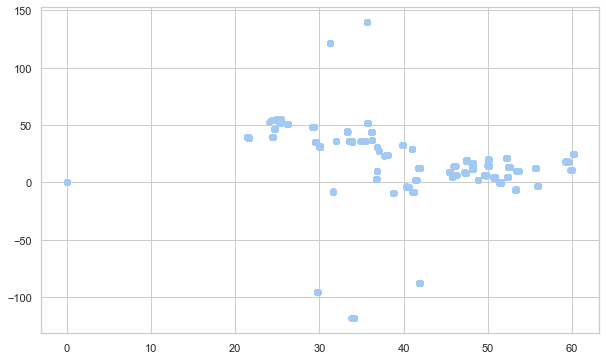

In [125]:
plt.scatter(x, y)
plt.show()

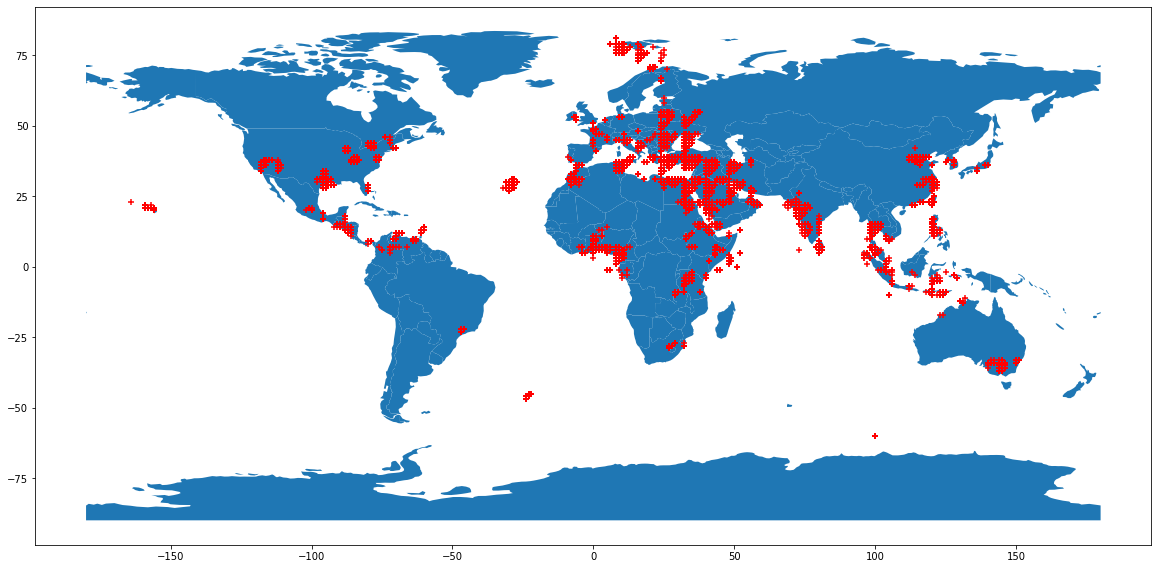

In [28]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(x, y)]
gdf = GeoDataFrame(geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 12)), marker='+', color='red', markersize=40);

In [2]:
hotel = hotels.hotel_details(645103552)

In [17]:
rest = places.get_closest_places(hotel['latitude'], hotel['longitude'] , 2500, 'restaurants')

In [18]:
hotel['latitude'], hotel['longitude'],

(41.07552, 28.98155)

In [19]:
rest['features']

[{'type': 'Feature',
  'id': '6425624',
  'geometry': {'type': 'Point', 'coordinates': [28.96932, 41.074863]},
  'properties': {'xid': 'N5737154621',
   'name': 'boga',
   'dist': 1030.3382306,
   'rate': 1,
   'osm': 'node/5737154621',
   'kinds': 'restaurants,foods,tourist_facilities'}},
 {'type': 'Feature',
  'id': '1435848',
  'geometry': {'type': 'Point', 'coordinates': [28.973324, 41.066521]},
  'properties': {'xid': 'N2055997023',
   'name': 'KARDEŞLER LOKANTASI',
   'dist': 1215.16270996,
   'rate': 1,
   'osm': 'node/2055997023',
   'kinds': 'restaurants,foods,tourist_facilities'}},
 {'type': 'Feature',
  'id': '6752273',
  'geometry': {'type': 'Point', 'coordinates': [28.988148, 41.063965]},
  'properties': {'xid': 'N5100368021',
   'name': 'Köfteci Ramiz',
   'dist': 1397.86510496,
   'rate': 1,
   'osm': 'node/5100368021',
   'kinds': 'restaurants,foods,tourist_facilities'}},
 {'type': 'Feature',
  'id': '6702407',
  'geometry': {'type': 'Point', 'coordinates': [28.986485, 

In [22]:
tour = places.get_closest_places(hotel['latitude'], hotel['longitude'] , 5000, 'museums')

In [23]:
tour

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '9479060',
   'geometry': {'type': 'Point', 'coordinates': [28.987259, 41.056381]},
   'properties': {'xid': 'N3135406162',
    'name': 'Atatürk Museum',
    'dist': 2178.91142901,
    'rate': 3,
    'osm': 'node/3135406162',
    'wikidata': 'Q3701681',
    'kinds': 'biographical_museums,historic_house_museums,museums,cultural,interesting_places,history_museums'}},
  {'type': 'Feature',
   'id': '58791',
   'geometry': {'type': 'Point', 'coordinates': [28.993729, 41.056149]},
   'properties': {'xid': 'N6559241038',
    'name': 'Eylül Sanat Galerisi',
    'dist': 2382.53946906,
    'rate': 1,
    'osm': 'node/6559241038',
    'kinds': 'museums,cultural,interesting_places,art_galleries'}},
  {'type': 'Feature',
   'id': '3476330',
   'geometry': {'type': 'Point', 'coordinates': [28.988243, 41.048874]},
   'properties': {'xid': 'N1346157990',
    'name': 'Military Museum',
    'dist': 3012.01738866,
    'rate': 3,
  